In [ ]:
import streamlit as st
from pycaret.classification import setup, compare_models,pull,save_model,load_model
import pandas as pd
from streamlit_pandas_profiling import st_profile_report
import ydata_profiling
import os

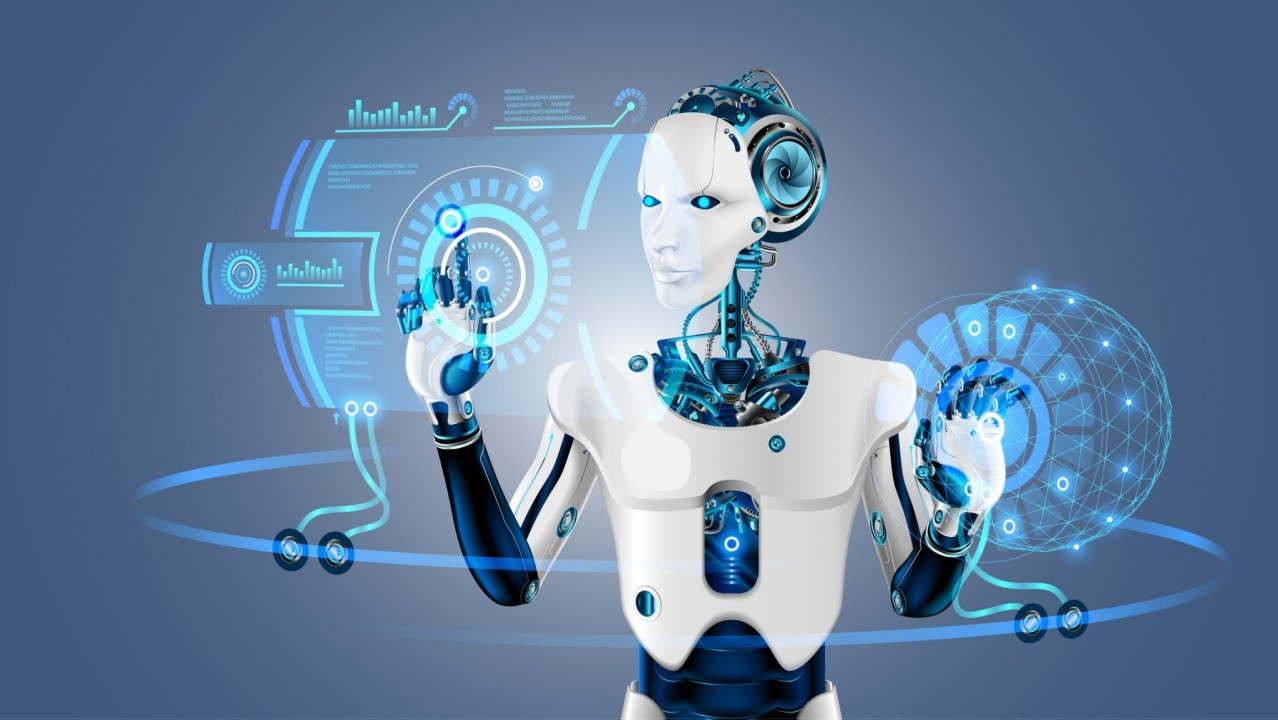

In [16]:
if os.path.exists('./dataset.csv'):
    df=pd.read_csv('dataset.csv', index_col=None)

In [18]:
with st.sidebar:
    st.image('https://www.automate.org/userAssets/riaUploads/image/Industrial-Robotics-AI-Machine-Learning.jpeg')
    st.title('AutoML Classification')
    choice = st.radio('Navigation', ['Upload File', 'Pycaret Modelling', 'Download Model'])

2024-09-09 11:59:15.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:15.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [19]:
if choice == 'Upload File':
    st.title('Upload Your File')
    file=st.file_uploader("Upload Your CSV File",type=['csv'])
    if file:
        df=pd.read_csv(file, index_col=None)
        df.to_csv('dataset.csv',index=None)
        st.dataframe(df.head())

2024-09-09 11:59:18.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:18.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:18.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:18.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:18.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-09 11:59:18.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [20]:
# if choice=='EDA Report':
#     st.title('Exploratory Data Analysis Report')
#     profile_df=df.profile_report()
#     st_profile_report(profile_df)

In [22]:
if choice=='Pycaret Modelling':
    target=st.selectbox('Choose the Target Column',df.columns)
    if st.button('train model'):
        setup(df,target=target)
        setup_df = pull()
        st.dataframe(setup_df)
        best_model=compare_models()
        compare_df=pull()
        st.dataframe(compare_df)
        save_model(best_model,'best_model')

In [23]:
if choice=='Download Model':
    with open('best_model.pkl', 'rb') as f:
        st.download_button('Download Best Model', f, 'best_model.pkl')